# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

In [51]:
## 1. Insumos

### 1.1 Carga de librerias, accesos y bases

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [53]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls -al

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/1_Datasets
total 15527
-rw------- 1 root root 8934363 Apr 17 19:16 1.1_input_dataset.csv
-rw------- 1 root root 1926620 Apr 24 00:22 1.2_sample_dataset.csv
-rw------- 1 root root 1408773 Apr 24 00:24 1.3_clean_dataset.csv
-rw------- 1 root root 1435591 Apr 24 00:29 1.4_cluster_dataset.csv
-rw------- 1 root root 2193608 Apr 24 02:03 1.5_encoding_dataset.csv


In [54]:
df = pd.read_csv('1.5_encoding_dataset.csv', index_col=0)

In [55]:
df.head(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster,NAP
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,4.42,352,244,2003,2,harri potter chamber secret harri potter 2 jk ...
1,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,3.79,152,1,2005,0,unauthor harri potter book seven news halfbloo...
2,0767910435,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,Broadway Books,3.88,256,131,2004,1,bryson dictionari troublesom word writer guid ...


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13405 entries, 0 to 13404
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            13405 non-null  object 
 1   Name            13405 non-null  object 
 2   Authors         13405 non-null  object 
 3   Publisher       13405 non-null  object 
 4   Rating          13405 non-null  float64
 5   pagesNumber     13405 non-null  int64  
 6   CountsOfReview  13405 non-null  int64  
 7   PublishYear     13405 non-null  int64  
 8   Cluster         13405 non-null  int64  
 9   NAP             13405 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.1+ MB


### 1.2 Vectorización de variable trasnformada

In [57]:
vec_df = CountVectorizer()
vec_df = vec_df.fit_transform(df['NAP'])
vec_df.shape

(13405, 16539)

In [58]:
sem_df = cosine_similarity(vec_df,vec_df)
sem_df.shape

(13405, 13405)

In [59]:
def orden_semejanza(ISBN):
    ind_sem = pd.Series(df.index, index=df['ISBN']).drop_duplicates()
    ind_sem = ind_sem[ISBN]

    sem = list(enumerate(sem_df[ind_sem]))
    sem = sorted(sem, key=lambda orden: orden[1], reverse=True)
   
    mask = [i[0] for i in sem]
    return df.iloc[mask].drop(columns = ['NAP'])

### 1.3 Instantanea

In [60]:
ISBN = '0007137273'

In [61]:
consulta = orden_semejanza(ISBN)
consulta.head(11)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
870,0007137273,The Annotated Hobbit,J.R.R. Tolkien,HarperCollins,4.27,399,16,2003,1
1061,026110263X,The Monsters and the Critics and Other Essays,J.R.R. Tolkien,HarperCollins,3.93,240,79,2006,1
9413,0007132840,J.R.R. Tolkien,Humphrey Carpenter,HarperCollins Publishers,4.08,384,8,2002,1
376,0618056998,The Letters of J.R.R. Tolkien,J.R.R. Tolkien,Mariner Books,4.15,502,175,2000,3
2475,0395606489,Pictures by J.R.R. Tolkien,J.R.R. Tolkien,Houghton Mifflin,4.47,102,15,1992,0
871,0618009345,Poems From The Hobbit,J.R.R. Tolkien,Houghton Mifflin Harcourt,4.30,57,5,1999,0
872,1594130051,The Hobbit: Or There and Back Again,J.R.R. Tolkien,Large Print Press,4.27,481,43,2003,3
3520,0007149123,Tales from the Perilous Realm,J.R.R. Tolkien,HarperCollins Publishers,4.08,178,165,2002,0
3526,026110330X,"The Hobbit, or, There and Back Again",J.R.R. Tolkien,Houghton Mifflin Company,4.27,289,56,1997,1
12534,0553525018,"The Silmarillion, Volume 2 (J.R.R. Tolkien)",J.R.R. Tolkien,Random House Audio,4.31,0,2,1998,0


In [62]:
consulta = consulta.reset_index()
consulta.head(3)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
0,870,0007137273,The Annotated Hobbit,J.R.R. Tolkien,HarperCollins,4.27,399,16,2003,1
1,1061,026110263X,The Monsters and the Critics and Other Essays,J.R.R. Tolkien,HarperCollins,3.93,240,79,2006,1
2,9413,0007132840,J.R.R. Tolkien,Humphrey Carpenter,HarperCollins Publishers,4.08,384,8,2002,1


In [63]:
consulta = consulta.drop(columns= ['index','Cluster'])
consulta.head(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0007137273,The Annotated Hobbit,J.R.R. Tolkien,HarperCollins,4.27,399,16,2003
1,026110263X,The Monsters and the Critics and Other Essays,J.R.R. Tolkien,HarperCollins,3.93,240,79,2006
2,0007132840,J.R.R. Tolkien,Humphrey Carpenter,HarperCollins Publishers,4.08,384,8,2002


In [64]:
consulta = consulta.reset_index()
consulta.head(3)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0,0007137273,The Annotated Hobbit,J.R.R. Tolkien,HarperCollins,4.27,399,16,2003
1,1,026110263X,The Monsters and the Critics and Other Essays,J.R.R. Tolkien,HarperCollins,3.93,240,79,2006
2,2,0007132840,J.R.R. Tolkien,Humphrey Carpenter,HarperCollins Publishers,4.08,384,8,2002


___
___

## 2 Pre-procesamiento

### 2.1 Normalización de variables numericas

In [15]:
num_df = consulta[list(consulta.columns[consulta.dtypes != object])]
num_df.head(3)

,index,Rating,pagesNumber,CountsOfReview,PublishYear
0,0,4.27,399,16,2003
1,1,3.93,240,79,2006
2,2,4.08,384,8,2002


In [65]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(num_df)
scaled_df

array([[-1.7319216 ,  1.26532463,  0.74807481, -0.60464468,  0.37922052],
       [-1.73166318, -0.0292622 , -0.33485344,  0.0087766 ,  0.92321543],
       [-1.73140477,  0.54187905,  0.64591177, -0.68253944,  0.19788888],
       ...,
       [ 1.73140477, -0.29579478,  0.53693785,  2.04377734, -0.16477439],
       [ 1.73166318, -1.74268595, -1.96946211, -0.76043421,  0.19788888],
       [ 1.7319216 , -0.44809912, -0.11690561, -0.71174998,  0.01655725]])

In [66]:
normalized_df = normalize(scaled_df) 
normalized_df

array([[-0.7273632 ,  0.53140429,  0.31417247, -0.25393545,  0.15926301],
       [-0.86974948, -0.01469731, -0.16818432,  0.00440816,  0.46369649],
       [-0.84347275,  0.2639823 ,  0.31466297, -0.33250655,  0.09640373],
       ...,
       [ 0.62896848, -0.10745355,  0.19505375,  0.74244426, -0.05985769],
       [ 0.53359513, -0.53699169, -0.60687055, -0.23432039,  0.06097753],
       [ 0.89785401, -0.23230127, -0.06060562, -0.36898181,  0.00858353]])

In [68]:
# ['Ordering', 'Rating', 'pagesNumber', 'CountsOfReview', 'PublishYear']
nor_df = pd.DataFrame(normalized_df)
nor_df.head(3)

,0,1,2,3,4
0,-0.727363,0.531404,0.314172,-0.253935,0.159263
1,-0.869749,-0.014697,-0.168184,0.004408,0.463696
2,-0.843473,0.263982,0.314663,-0.332507,0.096404


In [69]:
nor_df.shape

(13405, 5)

___

### 2.2 Analisis de componentes principales PCA

In [70]:
pca = PCA(n_components=nor_df.shape[1])
pca.fit(nor_df)

PCA(n_components=5)

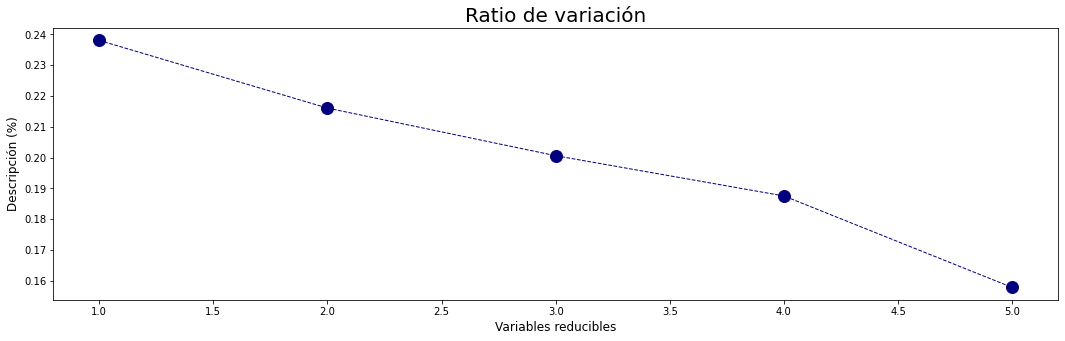

In [71]:
plt.figure(figsize=(18, 5))

plt.title("Ratio de variación", size = 20)
plt.xlabel("Variables reducibles", size = 12,)
plt.ylabel("Descripción (%)", size = 12)

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ratio_, color="navy", marker='o', linestyle='dashed', linewidth=1, markersize=12)

In [75]:
pca.explained_variance_ratio_[0:4].sum()

0.8421915161510772

In [45]:
pca = PCA(n_components=4)

___

## 3 Clustering a posteriori

### 3.1 Número de clusters

In [76]:
X_principal = pd.DataFrame(pca.fit_transform(nor_df) )
X_principal

,0,1,2,3,4
0,0.644579,0.582069,0.060008,-0.228053,-0.416604
1,0.946245,-0.030971,-0.219390,-0.181110,-0.012250
2,0.752649,0.410453,0.042834,-0.008539,-0.490823
3,0.563284,0.827089,-0.074047,0.238380,0.076472
4,0.446043,0.237329,0.841629,-0.242624,-0.018099
...,...,...,...,...,...
13400,-0.790272,-0.144363,-0.458708,-0.254851,-0.142278
13401,-0.786019,0.038062,-0.444806,-0.074512,-0.348222
13402,-0.598068,0.252002,-0.264612,0.254217,0.728679
13403,-0.403612,-0.875620,0.032412,-0.009531,0.147112


In [77]:
def ordena(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [78]:
# Promedio del cluster sobre 15 ensayos  

n_clusters=np.arange(2, 11)
sils=[]
err_sils=[]
vueltas=15

for n in n_clusters:
    tmp_sil=[]
    for _ in range(vueltas):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(ordena(np.array(tmp_sil), int(vueltas/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    err_sils.append(err)

Text(0, 0.5, 'Puntaje')

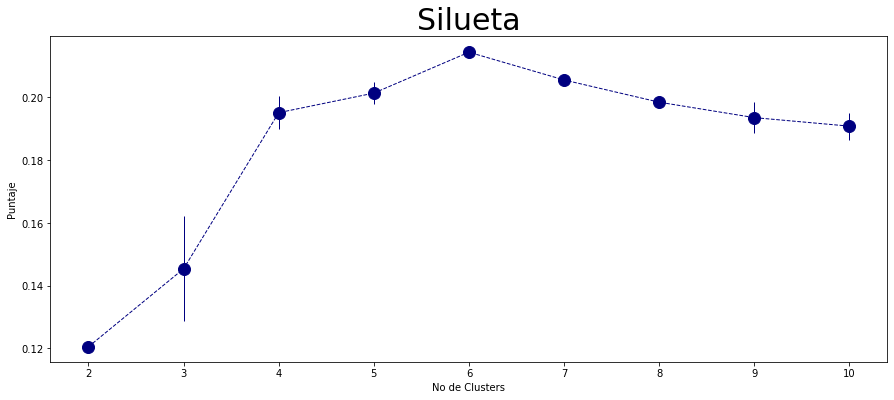

In [80]:
plt.figure(1, figsize = (15 ,6))
plt.errorbar(n_clusters, sils, yerr=err_sils,label='BIC', color='navy', marker='o', linestyle='dashed', linewidth=1, markersize=12)
plt.title('Silueta', fontsize=20,  size = 30)
plt.xticks(n_clusters)
plt.xlabel('No de Clusters')
plt.ylabel('Puntaje')

___

### 2.3 Modelo

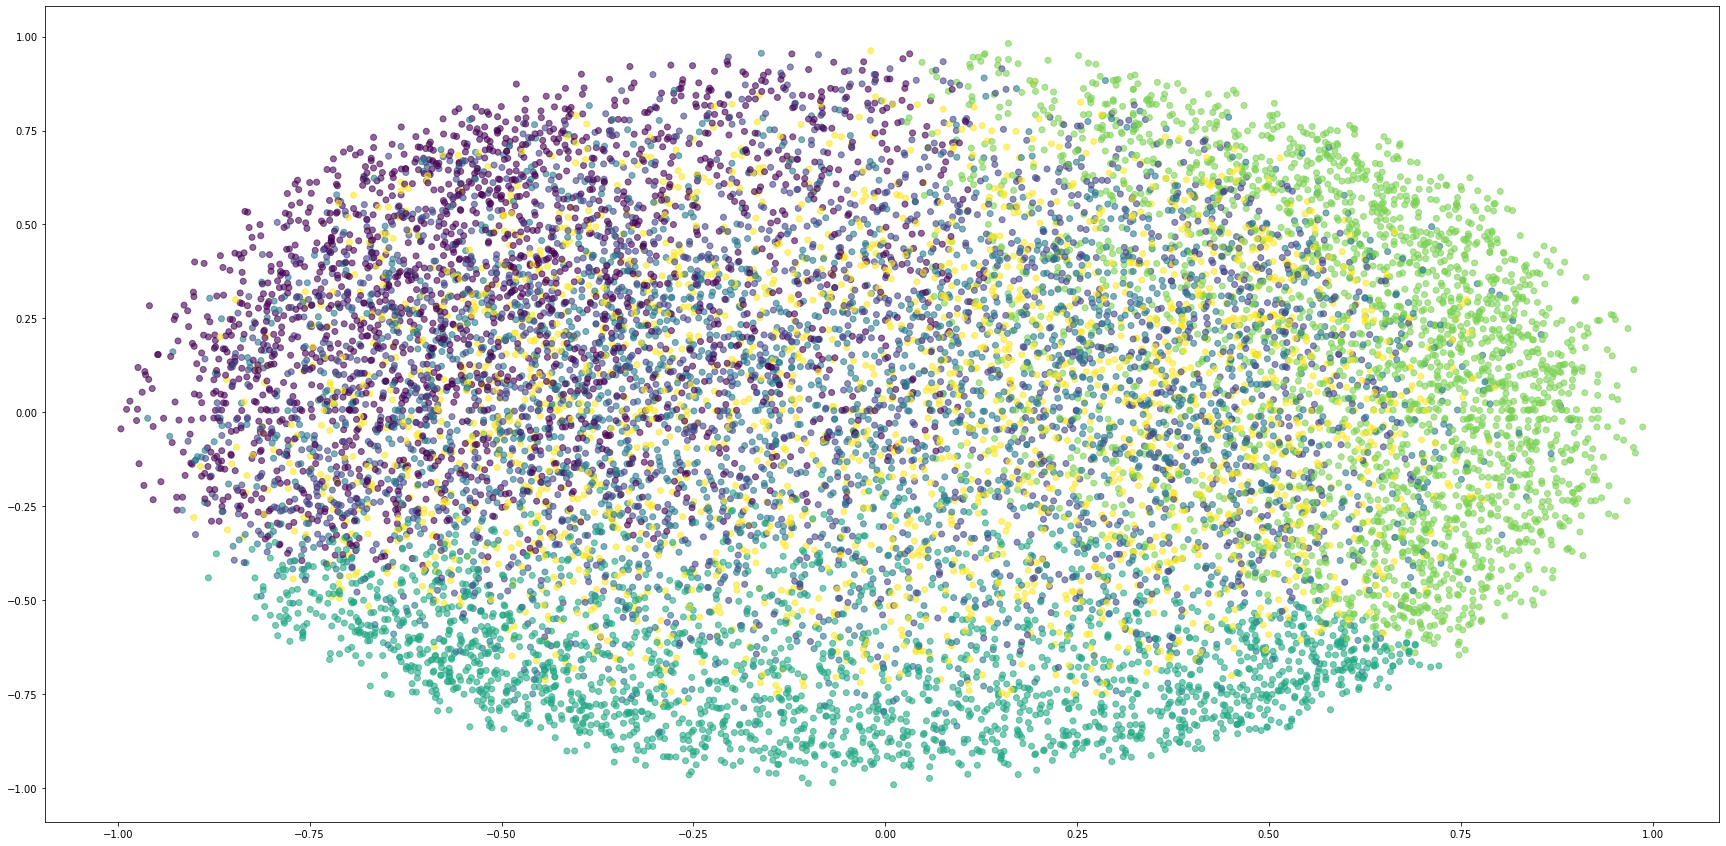

In [82]:
plt.figure(1, figsize = (30 , 15))
plt.scatter(nor_df[0], nor_df[1], c = GaussianMixture(n_components = 6).fit_predict(X_principal), alpha = 0.6) 
plt.show() 

In [83]:
consulta['Cluster'] = GaussianMixture(n_components = 6).fit_predict(X_principal)

In [84]:
consulta.head(11)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
0,0,0007137273,The Annotated Hobbit,J.R.R. Tolkien,HarperCollins,4.27,399,16,2003,3
1,1,026110263X,The Monsters and the Critics and Other Essays,J.R.R. Tolkien,HarperCollins,3.93,240,79,2006,3
2,2,0007132840,J.R.R. Tolkien,Humphrey Carpenter,HarperCollins Publishers,4.08,384,8,2002,0
3,3,0618056998,The Letters of J.R.R. Tolkien,J.R.R. Tolkien,Mariner Books,4.15,502,175,2000,5
4,4,0395606489,Pictures by J.R.R. Tolkien,J.R.R. Tolkien,Houghton Mifflin,4.47,102,15,1992,3
5,5,0618009345,Poems From The Hobbit,J.R.R. Tolkien,Houghton Mifflin Harcourt,4.30,57,5,1999,3
6,6,1594130051,The Hobbit: Or There and Back Again,J.R.R. Tolkien,Large Print Press,4.27,481,43,2003,0
7,7,0007149123,Tales from the Perilous Realm,J.R.R. Tolkien,HarperCollins Publishers,4.08,178,165,2002,5
8,8,026110330X,"The Hobbit, or, There and Back Again",J.R.R. Tolkien,Houghton Mifflin Company,4.27,289,56,1997,3
9,9,0553525018,"The Silmarillion, Volume 2 (J.R.R. Tolkien)",J.R.R. Tolkien,Random House Audio,4.31,0,2,1998,3


In [85]:
consulta[consulta['Cluster'] == 3].head(11)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
0,0,0007137273,The Annotated Hobbit,J.R.R. Tolkien,HarperCollins,4.27,399,16,2003,3
1,1,026110263X,The Monsters and the Critics and Other Essays,J.R.R. Tolkien,HarperCollins,3.93,240,79,2006,3
4,4,0395606489,Pictures by J.R.R. Tolkien,J.R.R. Tolkien,Houghton Mifflin,4.47,102,15,1992,3
5,5,0618009345,Poems From The Hobbit,J.R.R. Tolkien,Houghton Mifflin Harcourt,4.30,57,5,1999,3
8,8,026110330X,"The Hobbit, or, There and Back Again",J.R.R. Tolkien,Houghton Mifflin Company,4.27,289,56,1997,3
9,9,0553525018,"The Silmarillion, Volume 2 (J.R.R. Tolkien)",J.R.R. Tolkien,Random House Audio,4.31,0,2,1998,3
15,15,0007105045,Tree and Leaf: Includes Mythopoeia and The Hom...,J.R.R. Tolkien,HarperCollins Publishers Ltd,4.06,150,100,2001,3
17,17,0395957990,Roverandom,J.R.R. Tolkien,Houghton Mifflin Harcourt,3.87,128,70,1999,3
18,18,0060882603,The Annotated Charlotte's Web,E.B. White,HarperCollins,4.17,320,2,2006,3
19,19,0395898714,Roverandom,J.R.R. Tolkien,Houghton Mifflin Company,3.87,106,61,1998,3


___
___